# Propertly

This notebook will be demonstrating my work.

## #0.0 Import Libraries & Data

In [1]:
import pandas as pd
import numpy as np

import re

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df_init = pd.read_csv('../data/iProperty_sale_to_be_cleaned.csv')

## #1a Exploratory Data Analysis

In [3]:
print("\033[1m", 'DataFrame :', "\033[0m")
df_init.head()

 DataFrame : 


,name,price,psf,address,description,bedroom,bathroom,carpark
0,"The Park Sky Residence, Bukit Jalil","RM1,150,000",(RM 1042.61 per sq. ft.),"Bukit Jalil, Kuala Lumpur",Serviced Residence | Corner lot • Built-up :...,3,2.0,2.0
1,"Bukit Damansara, Damansara Heights","RM1,650,000",(RM 717.39 per sq. ft.),"Damansara Heights, Kuala Lumpur",2-sty Terrace/Link House | Intermediate • Bu...,4,3.0,2.0
2,"The Binjai on the Park, KL City Centre, KLCC","RM6,888,888",(RM 2140.74 per sq. ft.),"KLCC, Kuala Lumpur","Condominium | Corner lot • Built-up : 3,218 ...",3+1,4.0,3.0
3,"AMELIA, DESA PARKCITY, Desa ParkCity","RM2,700,000",(RM 1026.62 per sq. ft.),"Desa ParkCity, Kuala Lumpur","2-sty Terrace/Link House • Built-up : 2,630 ...",3+1,4.0,2.0
4,"AMELIA, DESA PARKCITY, Desa ParkCity","RM2,800,000",(RM 1076.92 per sq. ft.),"Desa ParkCity, Kuala Lumpur","2-sty Terrace/Link House • Built-up : 2,600 ...",3+1,4.0,2.0


In [4]:
print("\033[1m", 'Shape of DataFrame :', "\033[0m", df_init.shape)

 Shape of DataFrame :  (14599, 8)


In [5]:
print("\033[1m", 'DataFrame data types :', "\033[0m")
df_init.dtypes

 DataFrame data types : 


name            object
price           object
psf             object
address         object
description     object
bedroom         object
bathroom       float64
carpark        float64
dtype: object

In [6]:
print("\033[1m", 'DataFrame empty cells :', "\033[0m")
df_init.isnull().sum()

 DataFrame empty cells : 


name             15
price            15
psf              22
address          15
description       0
bedroom         555
bathroom        558
carpark        4461
dtype: int64

In [7]:
print("\033[1m", 'DataFrame duplicate rows :', "\033[0m", len(df_init)-len(df_init.drop_duplicates()))

 DataFrame duplicate rows :  811


In [8]:
for col in df_init.columns:
    print("\033[1m", col, "\033[0m")
    print(df_init[col].value_counts(),'\n')

 name 
Kuching                                                    196
Putrajaya                                                  121
Miri                                                       105
Jesselton Twin Towers, Kota Kinabalu                        92
Dwiputra Residences, Putrajaya                              74
                                                          ... 
Lapangan Hamorni Freehold Single Storey Semi-D , Ipoh        1
(Fully Furnished) Pengkalan Tiara Gated Guarded, Ipoh        1
Bercham Ipoh, Ipoh                                           1
Gunung Rapat Ampang Big Double Storey House 22x75, Ipoh      1
Kampung Bukit Tiu, Machang                                   1
Name: name, Length: 8022, dtype: int64 

 price 
RM 850,000     107
RM650,000      101
RM 450,000      97
RM 550,000      93
RM1,500,000     82
              ... 
RM418,500        1
RM477,800        1
RM479,400        1
RM194,000        1
RM 258,999       1
Name: price, Length: 2683, dtype: int64 



**Notes**
1. 'Address' column can be further split into 'District'(eg. Ipoh, Johor Bahru) and 'State'(eg. Selangor, Sarawak).
2. 'Description' column can be further split into 'Type'(eg. Bungalow, Terrace), 'Details'(eg. Intermediate, Corner Lot), 'Area'(eg. 2,200 sqft, 1000sqft) and 'Furnish'(eg. Unfurnished, Partly furnished).
3. 'Bedroom' column should add up the numbers between the '+' sign and 'Studio' value should be handled carefully.
4. 'Carpark' column that are empty should be filled with 0.
5. Drop all other empty cells and duplicated cells.
6. Numerical columns ['price', 'psf', 'area', 'bedroom', 'bathroom', 'carpark'] should be formatted to int64 or float64 dtype.
7. String columns ['district','state','type','details','furnish'] should be one hot encoded.

## #2 Data Cleaning
For purpose, I've created a single function that cleans everything and placed it below under 'Archive'.

Run that cell on a DataFrame and it will returned a cleaned DataFrame for you.

### #2.0 Create a copy of DataFrame

In [9]:
df_cleaned = df_init.copy()

### #2.1 Dealing with empty values

In [10]:
print("\033[1m", 'Before :', "\033[0m")
df_cleaned.isnull().sum()

 Before : 


name             15
price            15
psf              22
address          15
description       0
bedroom         555
bathroom        558
carpark        4461
dtype: int64

In [11]:
print("\033[1m", 'After1 :', "\033[0m")
df_cleaned.carpark.fillna(0, inplace=True)
df_cleaned.isnull().sum()

 After1 : 


name            15
price           15
psf             22
address         15
description      0
bedroom        555
bathroom       558
carpark          0
dtype: int64

In [12]:
print("\033[1m", 'After2 :', "\033[0m")
df_cleaned.dropna(inplace=True)
df_cleaned.isnull().sum()

 After2 : 


name           0
price          0
psf            0
address        0
description    0
bedroom        0
bathroom       0
carpark        0
dtype: int64

### #2.2 Dealing with duplicate values

In [13]:
print("\033[1m", 'Before :', "\033[0m", df_cleaned.shape)

 Before :  (14024, 8)


In [14]:
df_cleaned.drop_duplicates(inplace=True)
print("\033[1m", 'After :', "\033[0m", df_cleaned.shape)

 After :  (13222, 8)


In [15]:
df_cleaned.reset_index(drop=True, inplace=True)

### #2.3 Dealing with 'address' column

In [16]:
print("\033[1m", 'Before :', "\033[0m", df_cleaned.shape)
df_cleaned.head()

 Before :  (13222, 8)


,name,price,psf,address,description,bedroom,bathroom,carpark
0,"The Park Sky Residence, Bukit Jalil","RM1,150,000",(RM 1042.61 per sq. ft.),"Bukit Jalil, Kuala Lumpur",Serviced Residence | Corner lot • Built-up :...,3,2.0,2.0
1,"Bukit Damansara, Damansara Heights","RM1,650,000",(RM 717.39 per sq. ft.),"Damansara Heights, Kuala Lumpur",2-sty Terrace/Link House | Intermediate • Bu...,4,3.0,2.0
2,"The Binjai on the Park, KL City Centre, KLCC","RM6,888,888",(RM 2140.74 per sq. ft.),"KLCC, Kuala Lumpur","Condominium | Corner lot • Built-up : 3,218 ...",3+1,4.0,3.0
3,"AMELIA, DESA PARKCITY, Desa ParkCity","RM2,700,000",(RM 1026.62 per sq. ft.),"Desa ParkCity, Kuala Lumpur","2-sty Terrace/Link House • Built-up : 2,630 ...",3+1,4.0,2.0
4,"AMELIA, DESA PARKCITY, Desa ParkCity","RM2,800,000",(RM 1076.92 per sq. ft.),"Desa ParkCity, Kuala Lumpur","2-sty Terrace/Link House • Built-up : 2,600 ...",3+1,4.0,2.0


In [17]:
if "district" not in df_cleaned.columns: 
    df_cleaned.insert(4, "district", None)
if "state" not in df_cleaned.columns: 
    df_cleaned.insert(5, "state", None)

if "address" in df_cleaned.columns:
    for x in df_cleaned.index:
        addr = df_cleaned.loc[x,'address'].split(',')
        df_cleaned.loc[x,'district'] = addr[0].strip()
        df_cleaned.loc[x,'state'] = addr[1].strip()
        
    df_cleaned.drop(['address'], axis=1, inplace=True)

print("\033[1m", 'After :', "\033[0m", df_cleaned.shape)
df_cleaned.head()

 After :  (13222, 9)


,name,price,psf,district,state,description,bedroom,bathroom,carpark
0,"The Park Sky Residence, Bukit Jalil","RM1,150,000",(RM 1042.61 per sq. ft.),Bukit Jalil,Kuala Lumpur,Serviced Residence | Corner lot • Built-up :...,3,2.0,2.0
1,"Bukit Damansara, Damansara Heights","RM1,650,000",(RM 717.39 per sq. ft.),Damansara Heights,Kuala Lumpur,2-sty Terrace/Link House | Intermediate • Bu...,4,3.0,2.0
2,"The Binjai on the Park, KL City Centre, KLCC","RM6,888,888",(RM 2140.74 per sq. ft.),KLCC,Kuala Lumpur,"Condominium | Corner lot • Built-up : 3,218 ...",3+1,4.0,3.0
3,"AMELIA, DESA PARKCITY, Desa ParkCity","RM2,700,000",(RM 1026.62 per sq. ft.),Desa ParkCity,Kuala Lumpur,"2-sty Terrace/Link House • Built-up : 2,630 ...",3+1,4.0,2.0
4,"AMELIA, DESA PARKCITY, Desa ParkCity","RM2,800,000",(RM 1076.92 per sq. ft.),Desa ParkCity,Kuala Lumpur,"2-sty Terrace/Link House • Built-up : 2,600 ...",3+1,4.0,2.0


### #2.4 Dealing with 'description' column

In [18]:
print("\033[1m", 'Before :', "\033[0m", df_cleaned.shape)
df_cleaned.head()

 Before :  (13222, 9)


,name,price,psf,district,state,description,bedroom,bathroom,carpark
0,"The Park Sky Residence, Bukit Jalil","RM1,150,000",(RM 1042.61 per sq. ft.),Bukit Jalil,Kuala Lumpur,Serviced Residence | Corner lot • Built-up :...,3,2.0,2.0
1,"Bukit Damansara, Damansara Heights","RM1,650,000",(RM 717.39 per sq. ft.),Damansara Heights,Kuala Lumpur,2-sty Terrace/Link House | Intermediate • Bu...,4,3.0,2.0
2,"The Binjai on the Park, KL City Centre, KLCC","RM6,888,888",(RM 2140.74 per sq. ft.),KLCC,Kuala Lumpur,"Condominium | Corner lot • Built-up : 3,218 ...",3+1,4.0,3.0
3,"AMELIA, DESA PARKCITY, Desa ParkCity","RM2,700,000",(RM 1026.62 per sq. ft.),Desa ParkCity,Kuala Lumpur,"2-sty Terrace/Link House • Built-up : 2,630 ...",3+1,4.0,2.0
4,"AMELIA, DESA PARKCITY, Desa ParkCity","RM2,800,000",(RM 1076.92 per sq. ft.),Desa ParkCity,Kuala Lumpur,"2-sty Terrace/Link House • Built-up : 2,600 ...",3+1,4.0,2.0


In [19]:
if "type" not in df_cleaned.columns: 
    df_cleaned.insert(5, "type", None)
if "details" not in df_cleaned.columns: 
    df_cleaned.insert(6, "details", None)
if "area" not in df_cleaned.columns: 
    df_cleaned.insert(7, "area", None)

if "description" in df_cleaned.columns:
    for x in df_cleaned.index:
        desc = df_cleaned.loc[x,'description'].split('\xa0•\xa0')
        df_cleaned.loc[x,'area'] = desc[1].strip()
        
        h_type = desc[0].strip().split(' | ')
        if len(h_type) >= 1:
            df_cleaned.loc[x,'type'] = h_type[0].strip()
        if len(h_type) >= 2:
            df_cleaned.loc[x,'details'] = h_type[1].strip()
        
    df_cleaned.drop(['description'], axis=1, inplace=True)

print("\033[1m", 'After :', "\033[0m", df_cleaned.shape)
df_cleaned.head()

 After :  (13222, 11)


,name,price,psf,district,state,type,details,area,bedroom,bathroom,carpark
0,"The Park Sky Residence, Bukit Jalil","RM1,150,000",(RM 1042.61 per sq. ft.),Bukit Jalil,Kuala Lumpur,Serviced Residence,Corner lot,"Built-up : 1,103 sq. ft.",3,2.0,2.0
1,"Bukit Damansara, Damansara Heights","RM1,650,000",(RM 717.39 per sq. ft.),Damansara Heights,Kuala Lumpur,2-sty Terrace/Link House,Intermediate,"Built-up : 2,300 sq. ft.",4,3.0,2.0
2,"The Binjai on the Park, KL City Centre, KLCC","RM6,888,888",(RM 2140.74 per sq. ft.),KLCC,Kuala Lumpur,Condominium,Corner lot,"Built-up : 3,218 sq. ft.",3+1,4.0,3.0
3,"AMELIA, DESA PARKCITY, Desa ParkCity","RM2,700,000",(RM 1026.62 per sq. ft.),Desa ParkCity,Kuala Lumpur,2-sty Terrace/Link House,None,"Built-up : 2,630 sq. ft.",3+1,4.0,2.0
4,"AMELIA, DESA PARKCITY, Desa ParkCity","RM2,800,000",(RM 1076.92 per sq. ft.),Desa ParkCity,Kuala Lumpur,2-sty Terrace/Link House,None,"Built-up : 2,600 sq. ft.",3+1,4.0,2.0


### #2.5 Dealing with 'Studio' cells

In [20]:
print("\033[1m", 'Before :', "\033[0m")
df_cleaned[(df_cleaned['bedroom'] == 'Studio') | (df_cleaned['details'] == 'Studio')][:]

 Before : 


,name,price,psf,district,state,type,details,area,bedroom,bathroom,carpark
598,"Arte Mont Kiara, Mont Kiara","RM380,000",(RM 859.73 per sq. ft.),Mont Kiara,Kuala Lumpur,Serviced Residence,Intermediate,Built-up : 442 sq. ft.,Studio,1.0,1.0
699,"Verve Suites, Mont Kiara","RM500,000",(RM 1082.25 per sq. ft.),Mont Kiara,Kuala Lumpur,Serviced Residence,None,Built-up : 462 sq. ft.,Studio,1.0,1.0
849,"Arcoris Soho, Mont Kiara","RM570,000",(RM 1149.19 per sq. ft.),Mont Kiara,Kuala Lumpur,Serviced Residence,None,Built-up : 496 sq. ft.,Studio,1.0,1.0
956,"So Sofitel @ Oxley Towers, KLCC","RM1,332,000",(RM 2304.5 per sq. ft.),KLCC,Kuala Lumpur,Serviced Residence,None,Built-up : 578 sq. ft.,Studio,1.0,1.0
1004,"Lucentia Residences, Bukit Bintang","RM700,000",(RM 1541.85 per sq. ft.),Bukit Bintang,Kuala Lumpur,Serviced Residence,Intermediate,Built-up : 454 sq. ft.,Studio,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12609,"Riverine Diamond, Kuching","RM 388,783",(RM 722.64 per sq. ft.),Kuching,Sarawak,Condominium,None,Built-up : 538 sq. ft.,Studio,1.0,1.0
12928,"Troika Residences, Kota Bharu","RM 398,000",(RM 786.56 per sq. ft.),Kota Bharu,Kelantan,Serviced Residence,None,Built-up : 506 sq. ft.,Studio,1.0,1.0
12947,"Anjung Vista, Kenali","RM 210,000",(RM 420 per sq. ft.),Kenali,Kelantan,Condominium,Studio,Built-up : 500 sq. ft.,Studio,1.0,0.0
13043,"Kota Bharu City Point, Bandar Kota Bharu, Kota...","RM 220,000",(RM 469.08 per sq. ft.),Kota Bharu,Kelantan,Apartment,None,Built-up : 469 sq. ft.,Studio,1.0,1.0


In [21]:
for x in df_cleaned.index:
    if 'Studio' in df_cleaned.loc[x,'bedroom']:
        df_cleaned.loc[x,'details'] = 'Studio'
        df_cleaned.loc[x,'bedroom'] = '1'
print("\033[1m", 'After :', "\033[0m")
df_cleaned[(df_cleaned['bedroom'] == 'Studio') | (df_cleaned['details'] == 'Studio')][:]

 After : 


,name,price,psf,district,state,type,details,area,bedroom,bathroom,carpark
598,"Arte Mont Kiara, Mont Kiara","RM380,000",(RM 859.73 per sq. ft.),Mont Kiara,Kuala Lumpur,Serviced Residence,Studio,Built-up : 442 sq. ft.,1,1.0,1.0
699,"Verve Suites, Mont Kiara","RM500,000",(RM 1082.25 per sq. ft.),Mont Kiara,Kuala Lumpur,Serviced Residence,Studio,Built-up : 462 sq. ft.,1,1.0,1.0
849,"Arcoris Soho, Mont Kiara","RM570,000",(RM 1149.19 per sq. ft.),Mont Kiara,Kuala Lumpur,Serviced Residence,Studio,Built-up : 496 sq. ft.,1,1.0,1.0
956,"So Sofitel @ Oxley Towers, KLCC","RM1,332,000",(RM 2304.5 per sq. ft.),KLCC,Kuala Lumpur,Serviced Residence,Studio,Built-up : 578 sq. ft.,1,1.0,1.0
1004,"Lucentia Residences, Bukit Bintang","RM700,000",(RM 1541.85 per sq. ft.),Bukit Bintang,Kuala Lumpur,Serviced Residence,Studio,Built-up : 454 sq. ft.,1,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12609,"Riverine Diamond, Kuching","RM 388,783",(RM 722.64 per sq. ft.),Kuching,Sarawak,Condominium,Studio,Built-up : 538 sq. ft.,1,1.0,1.0
12928,"Troika Residences, Kota Bharu","RM 398,000",(RM 786.56 per sq. ft.),Kota Bharu,Kelantan,Serviced Residence,Studio,Built-up : 506 sq. ft.,1,1.0,1.0
12947,"Anjung Vista, Kenali","RM 210,000",(RM 420 per sq. ft.),Kenali,Kelantan,Condominium,Studio,Built-up : 500 sq. ft.,1,1.0,0.0
13043,"Kota Bharu City Point, Bandar Kota Bharu, Kota...","RM 220,000",(RM 469.08 per sq. ft.),Kota Bharu,Kelantan,Apartment,Studio,Built-up : 469 sq. ft.,1,1.0,1.0


### #2.6 Dealing with bedroom column

In [22]:
print("\033[1m", 'Before :', "\033[0m")
print(df_cleaned[['bedroom']].dtypes, '\n')
print(df_cleaned.bedroom.value_counts())

 Before : 
bedroom    object
dtype: object 

4        3807
3        3745
5        1098
4+1       969
2         750
3+1       632
6         523
5+1       442
1         320
6+1       191
2+1       127
7         108
4+2        83
5+2        68
8          59
1+1        53
7+1        41
3+2        39
6+2        22
7+2        15
11         14
5+3        11
8+1        11
9          10
6+3         9
10          8
9+1         8
8+2         6
3+3         6
4+3         5
11+2        5
13          4
7+3         4
8+3         3
11+1        2
10+1        2
2+2         2
5+4         2
7+7         2
4+4         1
4+17        1
18          1
14          1
15          1
9+2         1
1+3         1
15+10       1
8+8         1
12          1
7+4         1
12+4        1
8+5         1
5+5         1
6+4         1
7+6         1
Name: bedroom, dtype: int64


In [23]:
for x in df_cleaned.index:
    rooms = df_cleaned.loc[x,'bedroom'].split('+')
    if len(rooms) == 1:
        df_cleaned.loc[x,'bedroom'] = int(rooms[0])
    if len(rooms) == 2:
        df_cleaned.loc[x,'bedroom'] = int(rooms[0]) + int(rooms[1])

print("\033[1m", 'After :', "\033[0m")
print(df_cleaned[['bedroom']].dtypes, '\n')
print(df_cleaned.bedroom.value_counts())

 After : 
bedroom    object
dtype: object 

4     4442
3     3872
5     2106
6     1054
2      803
7      372
1      320
8      134
9       47
10      28
11      21
13      11
14       3
12       3
16       2
25       1
21       1
15       1
18       1
Name: bedroom, dtype: int64


### #2.7 Dealing with details column

In [24]:
print("\033[1m", 'Before :', "\033[0m")
print('Number of empty cells :', df_cleaned.details.isnull().sum(), '\n')
print(df_cleaned.details.value_counts())

 Before : 
Number of empty cells : 6341 

Intermediate    4321
Corner lot      1927
End lot          398
Studio           103
Penthouse         54
Duplex            46
Dual key          23
Triplex            5
Soho               4
Name: details, dtype: int64


In [25]:
df_cleaned.details.fillna('Default', inplace=True)
        
print("\033[1m", 'After :', "\033[0m")
print('Number of empty cells :', df_cleaned.details.isnull().sum(), '\n')
print(df_cleaned.details.value_counts())

 After : 
Number of empty cells : 0 

Default         6341
Intermediate    4321
Corner lot      1927
End lot          398
Studio           103
Penthouse         54
Duplex            46
Dual key          23
Triplex            5
Soho               4
Name: details, dtype: int64


### #2.8 Extracting numeric value from price, psf and area

In [26]:
print("\033[1m", 'Before :', "\033[0m")
df_cleaned[['price','area','psf']].info()

 Before : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13222 entries, 0 to 13221
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   price   13222 non-null  object
 1   area    13222 non-null  object
 2   psf     13222 non-null  object
dtypes: object(3)
memory usage: 310.0+ KB


In [27]:
for x in df_cleaned.index:
    df_cleaned.loc[x,'price'] = re.sub(r'\,','',df_cleaned.loc[x,'price'])
    df_cleaned.loc[x,'price'] = re.findall('\d+',df_cleaned.loc[x,'price'])[0]
    
    df_cleaned.loc[x,'psf'] = re.sub(r'\,','',df_cleaned.loc[x,'psf'])
    df_cleaned.loc[x,'psf'] = re.findall('\d+.?\d*',df_cleaned.loc[x,'psf'])[0]
    
    try:
        df_cleaned.loc[x,'area'] = re.sub(r'\,','',df_cleaned.loc[x,'area'])
        df_cleaned.loc[x,'area'] = re.findall('\d+',df_cleaned.loc[x,'area'])[0]
    except:
        continue
    
    
print("\033[1m", 'After :', "\033[0m")
df_cleaned[['price','area','psf']]

 After : 


,price,area,psf
0,1150000,1103,1042.61
1,1650000,2300,717.39
2,6888888,3218,2140.74
3,2700000,2630,1026.62
4,2800000,2600,1076.92
...,...,...,...
13217,397000,1440,275.69
13218,600000,2008,298.8
13219,175000,1097,159.53
13220,420000,1900,221.05


### #2.9 Converting data to the correct data type

In [28]:
print("\033[1m", 'Before :', "\033[0m")
df_cleaned.dtypes

 Before : 


name         object
price        object
psf          object
district     object
state        object
type         object
details      object
area         object
bedroom      object
bathroom    float64
carpark     float64
dtype: object

In [29]:
df_cleaned.area.fillna(pd.to_numeric(df_cleaned.area.dropna()).median(), inplace=True)

In [30]:
df_cleaned = df_cleaned.astype({'price':'int64','area':'int64','psf':'float64','bedroom':'int64','bathroom':'int64','carpark':'int64'})

print("\033[1m", 'After :', "\033[0m")
df_cleaned.dtypes

 After : 


name         object
price         int64
psf         float64
district     object
state        object
type         object
details      object
area          int64
bedroom       int64
bathroom      int64
carpark       int64
dtype: object

In [31]:
df_cleaned.head()

,name,price,psf,district,state,type,details,area,bedroom,bathroom,carpark
0,"The Park Sky Residence, Bukit Jalil",1150000,1042.61,Bukit Jalil,Kuala Lumpur,Serviced Residence,Corner lot,1103,3,2,2
1,"Bukit Damansara, Damansara Heights",1650000,717.39,Damansara Heights,Kuala Lumpur,2-sty Terrace/Link House,Intermediate,2300,4,3,2
2,"The Binjai on the Park, KL City Centre, KLCC",6888888,2140.74,KLCC,Kuala Lumpur,Condominium,Corner lot,3218,4,4,3
3,"AMELIA, DESA PARKCITY, Desa ParkCity",2700000,1026.62,Desa ParkCity,Kuala Lumpur,2-sty Terrace/Link House,Default,2630,4,4,2
4,"AMELIA, DESA PARKCITY, Desa ParkCity",2800000,1076.92,Desa ParkCity,Kuala Lumpur,2-sty Terrace/Link House,Default,2600,4,4,2


In [32]:
# df_cleaned.to_csv('./data/iProperty_rent_to_be_trained.csv', index=False)

## #1b Exploratory Data Re-Analysis

### #1b.1 Numeric Data

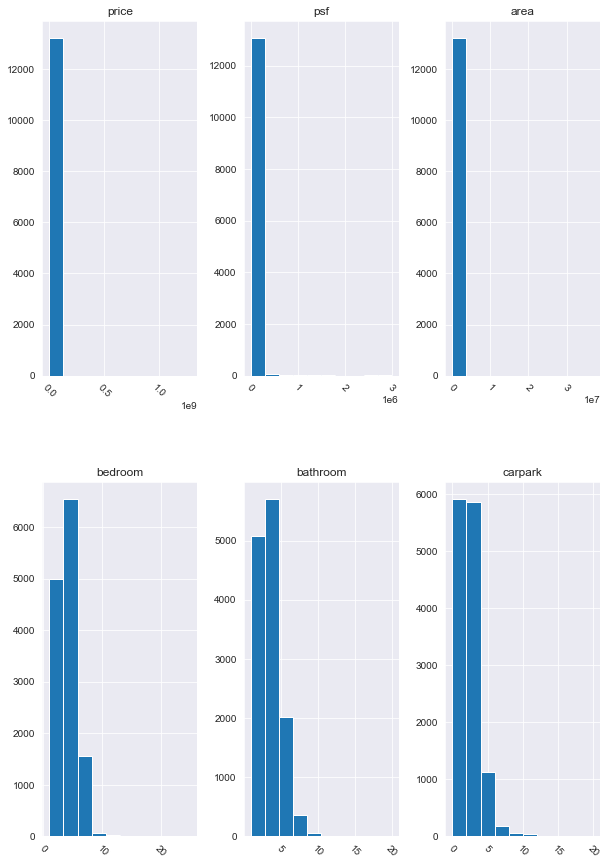

In [33]:
df_cleaned.hist(figsize=(10,15), xrot=-45, layout=(2,3))
plt.show()

In [34]:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
price,13222.0,1.419758e+06,1.666868e+07,12345.00,420000.00,661750.00,1200000.000,1.288000e+09
psf,13222.0,1.154549e+04,1.215985e+05,0.03,286.51,408.33,587.605,3.000000e+06
area,13222.0,6.939761e+03,3.524714e+05,1.00,1126.00,1740.00,2760.000,3.702785e+07
bedroom,13222.0,4.016488e+00,1.447579e+00,1.00,3.00,4.00,5.000,2.500000e+01
bathroom,13222.0,3.240130e+00,1.528010e+00,1.00,2.00,3.00,4.000,2.000000e+01
carpark,13222.0,1.660112e+00,1.583482e+00,0.00,0.00,2.00,2.000,2.000000e+01


**Notes**
- **Bedroom**, **Bathroom** and **Carpark** are discrete variables, but can be modeled as continuous variables
- **Price**, **Psf** and **Area** are continuous variables

In [35]:
cont_var = ['price','psf','area']
disc_var = ['bedroom','bathroom','carpark']

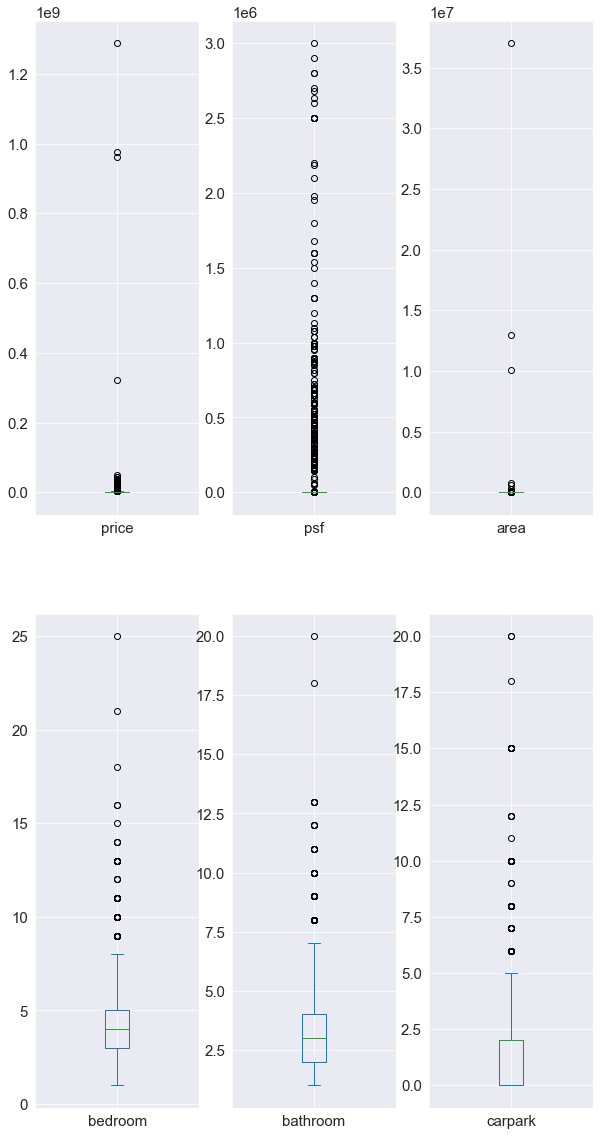

In [36]:
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

df_cleaned[cont_var+disc_var].plot(kind='box', subplots=True, figsize=(10,20), layout=(2,3))

plt.show()

**Notes**
- There are outliers especially in **Price** and **Area**

In [37]:
df_cleaned['calculated_price'] = df_cleaned.psf * df_cleaned.area
df_cleaned[['calculated_price']]

,calculated_price
0,1149998.83
1,1649997.00
2,6888901.32
3,2700010.60
4,2799992.00
...,...
13217,396993.60
13218,599990.40
13219,175004.41
13220,419995.00


In [38]:
a = 0
b = df_cleaned.calculated_price - df_cleaned.price
for c in b:
    if abs(c) > a:
        a = c
print(a)

51.5


**Notes**
- There is no discrepancy between the calculated price and selling price

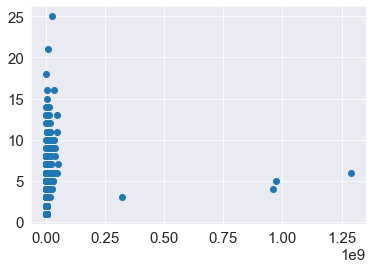

In [39]:
plt.scatter(x=df_cleaned['price'], y=df_cleaned['bedroom'])

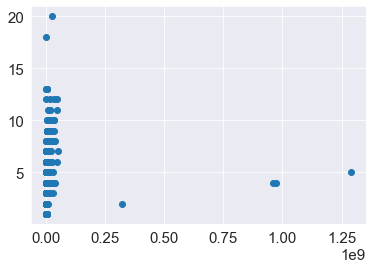

In [40]:
plt.scatter(x=df_cleaned['price'], y=df_cleaned['bathroom'])

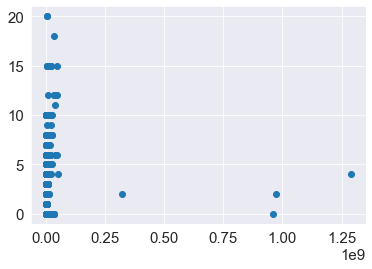

In [41]:
plt.scatter(x=df_cleaned['price'], y=df_cleaned['carpark'])

### #1b.2 Categorical Data

In [42]:
df_cleaned.describe(include=['object']).T

,count,unique,top,freq
name,13222,7666,Kuching,166
district,13222,315,Putrajaya,1176
state,13222,12,Selangor,1617
type,13222,15,2-sty Terrace/Link House,3086
details,13222,10,Default,6341


**Notes**
- 'Name' can be ignored as it has too many unique values

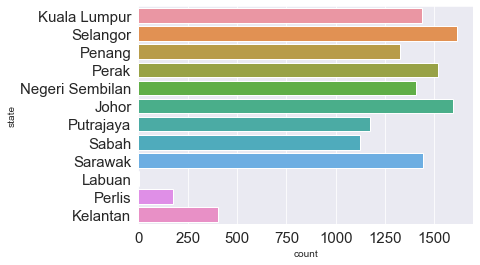

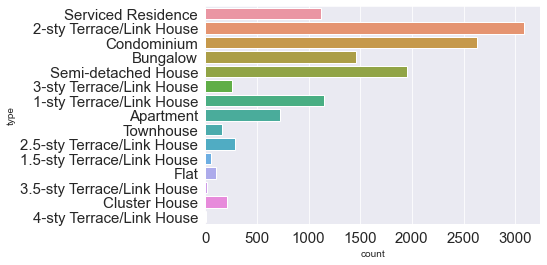

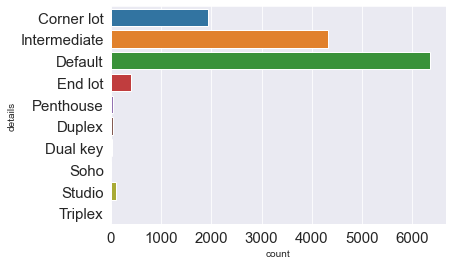

In [43]:
for feature in df_cleaned.dtypes[df_cleaned.dtypes == "object"].drop(["name","district"]).index:
    sns.countplot(y=feature, data=df_cleaned)
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Kuala Lumpur'),
  Text(1, 0, 'Selangor'),
  Text(2, 0, 'Penang'),
  Text(3, 0, 'Perak'),
  Text(4, 0, 'Negeri Sembilan'),
  Text(5, 0, 'Johor'),
  Text(6, 0, 'Putrajaya'),
  Text(7, 0, 'Sabah'),
  Text(8, 0, 'Sarawak'),
  Text(9, 0, 'Labuan'),
  Text(10, 0, 'Perlis'),
  Text(11, 0, 'Kelantan')])

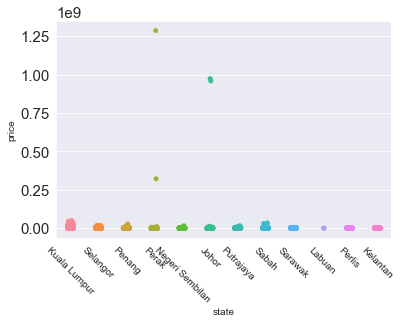

In [44]:
x = df_cleaned.state
y = df_cleaned.price

ax = sns.stripplot(x,y)

plt.xticks(rotation=-45, size=10)

### #1b.3 Correlation

In [45]:
correlation = df_cleaned.drop(['calculated_price','psf','area'], axis=1).corr()
correlation

,price,bedroom,bathroom,carpark
price,1.000000,0.064902,0.070313,0.045674
bedroom,0.064902,1.000000,0.842972,0.312654
bathroom,0.070313,0.842972,1.000000,0.317893
carpark,0.045674,0.312654,0.317893,1.000000


In [46]:
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = 1

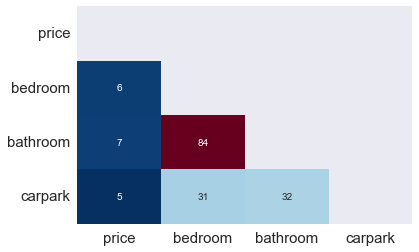

In [47]:
sns.heatmap(correlation*100, 
            cmap="RdBu_r", 
            annot=True, 
            fmt=".0f", 
            mask=mask,
            cbar=False
           )

plt.show()

## #3 Feature Engineering

In [48]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import OneHotEncoder

### #3.0 Create a copy of DataFrame

In [49]:
df_train = pd.read_csv('../data/iProperty_rent_to_be_trained.csv')

### #3.1 Remove redundant columns

In [50]:
print("\033[1m", 'Before :', "\033[0m")
df_train.head()

 Before : 


,name,price,psf,district,state,type,details,area,bedroom,bathroom,carpark
0,"M Vertica, Taman Maluri, Cheras",1400,1.65,Cheras,Kuala Lumpur,Condominium,Default,850,3,2,1
1,"M Vertica, Taman Maluri, Cheras",1700,2.00,Cheras,Kuala Lumpur,Condominium,Default,850,3,2,2
2,"Desa Green, Taman Desa",1800,2.52,Taman Desa,Kuala Lumpur,Serviced Residence,Studio,715,2,2,1
3,"Arcoris Residences, Mont Kiara",5000,5.51,Mont Kiara,Kuala Lumpur,Serviced Residence,Intermediate,907,2,2,1
4,"Desa Green, Taman Desa",1400,2.42,Taman Desa,Kuala Lumpur,Serviced Residence,Default,578,1,1,1


In [51]:
df_train.drop(['name','psf','area'], axis=1, inplace=True)

print("\033[1m", 'After :', "\033[0m")
df_train.head()

 After : 


,price,district,state,type,details,bedroom,bathroom,carpark
0,1400,Cheras,Kuala Lumpur,Condominium,Default,3,2,1
1,1700,Cheras,Kuala Lumpur,Condominium,Default,3,2,2
2,1800,Taman Desa,Kuala Lumpur,Serviced Residence,Studio,2,2,1
3,5000,Mont Kiara,Kuala Lumpur,Serviced Residence,Intermediate,2,2,1
4,1400,Taman Desa,Kuala Lumpur,Serviced Residence,Default,1,1,1


### #3.2 Defining Columns

In [52]:
cat_col = df_train.select_dtypes([object]).columns.tolist()
num_col = df_train.select_dtypes([int,float]).drop(['price'], axis=1).columns.tolist()
tar_col = df_train[['price']].columns.tolist()

In [53]:
print(cat_col, num_col,tar_col)

['district', 'state', 'type', 'details'] ['bedroom', 'bathroom', 'carpark'] ['price']


### #3.3 Remove outliers

In [54]:
print("\033[1m", 'Before :', "\033[0m")
df_train.describe().T

 Before : 


,count,mean,std,min,25%,50%,75%,max
price,10781.0,5684.784714,75581.749568,100.0,1500.0,2000.0,3000.0,3800000.0
bedroom,10781.0,3.160931,1.279776,1.0,2.0,3.0,4.0,14.0
bathroom,10781.0,2.535294,1.254078,1.0,2.0,2.0,3.0,30.0
carpark,10781.0,1.465170,1.464742,0.0,1.0,1.0,2.0,99.0


In [55]:
for col in tar_col:
    q_low = df_train[col].quantile(0.01)
    q_hi  = df_train[col].quantile(0.99)
    df_train = df_train[(df_train[col] < q_hi) & (df_train[col] > q_low)]
    
print("\033[1m", 'After :', "\033[0m")
df_train.describe().T

 After : 


,count,mean,std,min,25%,50%,75%,max
price,10544.0,2594.700303,1980.674897,610.0,1500.0,2000.0,2900.0,14500.0
bedroom,10544.0,3.147667,1.244892,1.0,2.0,3.0,4.0,14.0
bathroom,10544.0,2.516597,1.193230,1.0,2.0,2.0,3.0,10.0
carpark,10544.0,1.457606,1.110044,0.0,1.0,1.0,2.0,50.0


### #3.3 One hot encode categorical columns

In [56]:
print("\033[1m", 'Before :', "\033[0m")
df_train

 Before : 


,price,district,state,type,details,bedroom,bathroom,carpark
0,1400,Cheras,Kuala Lumpur,Condominium,Default,3,2,1
1,1700,Cheras,Kuala Lumpur,Condominium,Default,3,2,2
2,1800,Taman Desa,Kuala Lumpur,Serviced Residence,Studio,2,2,1
3,5000,Mont Kiara,Kuala Lumpur,Serviced Residence,Intermediate,2,2,1
4,1400,Taman Desa,Kuala Lumpur,Serviced Residence,Default,1,1,1
...,...,...,...,...,...,...,...,...
10776,1450,Kuching,Sarawak,NaN,Default,2,2,1
10777,2900,Kota Bharu,Kelantan,NaN,Default,3,2,1
10778,1250,Kenali,Kelantan,NaN,Default,1,1,1
10779,3000,Kota Bharu,Kelantan,NaN,Default,3,2,2


In [57]:
ohe = OneHotEncoder()

In [58]:
ohe.fit(df_train[cat_col])

OneHotEncoder()

In [59]:
cat_arr = ohe.transform(df_train[cat_col]).toarray()

In [60]:
cat_arr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

### #3.4 Declaring number array

In [71]:
num_arr = df_train.drop(cat_col + tar_col, axis=1).to_numpy()
num_arr

array([[3, 2, 1],
       [3, 2, 2],
       [2, 2, 1],
       ...,
       [1, 1, 1],
       [3, 2, 2],
       [1, 1, 0]], dtype=int64)

### #3.5 Convert target to array

In [72]:
tar_arr = df_train.price.to_numpy()
tar_arr = tar_arr.reshape(tar_arr.shape[0],1)

In [73]:
tar_arr

array([[1400],
       [1700],
       [1800],
       ...,
       [1250],
       [3000],
       [1300]], dtype=int64)

### #3.6 Concatenate all arrays

In [74]:
train_arr = np.concatenate((tar_arr,num_arr,cat_arr),axis=1)
train_arr

array([[1.40e+03, 3.00e+00, 2.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [1.70e+03, 3.00e+00, 2.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [1.80e+03, 2.00e+00, 2.00e+00, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       ...,
       [1.25e+03, 1.00e+00, 1.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [3.00e+03, 3.00e+00, 2.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [1.30e+03, 1.00e+00, 1.00e+00, ..., 0.00e+00, 1.00e+00, 0.00e+00]])

 ### #4 Algorithm Selection

Since our target (price) is a continuous numeric variable, we will be using **regression** to solve the problem:
- Linear Regression
- Decision Tree
- Random Forest
- Support Vector Machine
- K Neighbours

## #5 Model Training

In [75]:
import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.pipeline import make_pipeline

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from yellowbrick.regressor import PredictionError, ResidualsPlot
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

### #5.0 Assigning X and y

In [76]:
X = train_arr[:,1:]
display(X)
y = train_arr[:,0]
display(y)

array([[3., 2., 1., ..., 0., 0., 0.],
       [3., 2., 2., ..., 0., 0., 0.],
       [2., 2., 1., ..., 0., 1., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [3., 2., 2., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 1., 0.]])

array([1400., 1700., 1800., ..., 1250., 3000., 1300.])

### #5.1 Train Test Split X and y

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### #5.2 Building pipelines

In [85]:
SEED = 42

pipelines = {
#     'Linear Regression': make_pipeline(LinearRegression()),
#     'Ridge': make_pipeline(Ridge(random_state=SEED)), 
#     'SGD': make_pipeline(SGDRegressor(random_state=SEED)), 
#     'Lasso': make_pipeline(Lasso(random_state=SEED)),
    'Decision Tree': make_pipeline(DecisionTreeRegressor(random_state=SEED)),
    'Random Forest': make_pipeline(RandomForestRegressor(random_state=SEED)),
    'Support Vector Machine': make_pipeline(SVR()),
    'K Neighbors': make_pipeline(KNeighborsRegressor()),
#     'Boosting': make_pipeline(AdaBoostRegressor(random_state=SEED)),
#     'Bagging': make_pipeline(BaggingRegressor(random_state=SEED)),
    'Gradient Boost': make_pipeline(GradientBoostingRegressor(random_state=SEED)),
    'Neural Network': make_pipeline(MLPRegressor(random_state=SEED)),
}

### #5.3 Find tubeable parameters

In [86]:
DecisionTreeRegressor().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [87]:
for model, pipeline in pipelines.items():
    print(model)
    display(pipeline.get_params())

Decision Tree


{'memory': None,
 'steps': [('decisiontreeregressor', DecisionTreeRegressor(random_state=42))],
 'verbose': False,
 'decisiontreeregressor': DecisionTreeRegressor(random_state=42),
 'decisiontreeregressor__ccp_alpha': 0.0,
 'decisiontreeregressor__criterion': 'squared_error',
 'decisiontreeregressor__max_depth': None,
 'decisiontreeregressor__max_features': None,
 'decisiontreeregressor__max_leaf_nodes': None,
 'decisiontreeregressor__min_impurity_decrease': 0.0,
 'decisiontreeregressor__min_samples_leaf': 1,
 'decisiontreeregressor__min_samples_split': 2,
 'decisiontreeregressor__min_weight_fraction_leaf': 0.0,
 'decisiontreeregressor__random_state': 42,
 'decisiontreeregressor__splitter': 'best'}

Random Forest


{'memory': None,
 'steps': [('randomforestregressor', RandomForestRegressor(random_state=42))],
 'verbose': False,
 'randomforestregressor': RandomForestRegressor(random_state=42),
 'randomforestregressor__bootstrap': True,
 'randomforestregressor__ccp_alpha': 0.0,
 'randomforestregressor__criterion': 'squared_error',
 'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 1.0,
 'randomforestregressor__max_leaf_nodes': None,
 'randomforestregressor__max_samples': None,
 'randomforestregressor__min_impurity_decrease': 0.0,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__min_weight_fraction_leaf': 0.0,
 'randomforestregressor__n_estimators': 100,
 'randomforestregressor__n_jobs': None,
 'randomforestregressor__oob_score': False,
 'randomforestregressor__random_state': 42,
 'randomforestregressor__verbose': 0,
 'randomforestregressor__warm_start': False}

Support Vector Machine


{'memory': None,
 'steps': [('svr', SVR())],
 'verbose': False,
 'svr': SVR(),
 'svr__C': 1.0,
 'svr__cache_size': 200,
 'svr__coef0': 0.0,
 'svr__degree': 3,
 'svr__epsilon': 0.1,
 'svr__gamma': 'scale',
 'svr__kernel': 'rbf',
 'svr__max_iter': -1,
 'svr__shrinking': True,
 'svr__tol': 0.001,
 'svr__verbose': False}

K Neighbors


{'memory': None,
 'steps': [('kneighborsregressor', KNeighborsRegressor())],
 'verbose': False,
 'kneighborsregressor': KNeighborsRegressor(),
 'kneighborsregressor__algorithm': 'auto',
 'kneighborsregressor__leaf_size': 30,
 'kneighborsregressor__metric': 'minkowski',
 'kneighborsregressor__metric_params': None,
 'kneighborsregressor__n_jobs': None,
 'kneighborsregressor__n_neighbors': 5,
 'kneighborsregressor__p': 2,
 'kneighborsregressor__weights': 'uniform'}

Gradient Boost


{'memory': None,
 'steps': [('gradientboostingregressor',
   GradientBoostingRegressor(random_state=42))],
 'verbose': False,
 'gradientboostingregressor': GradientBoostingRegressor(random_state=42),
 'gradientboostingregressor__alpha': 0.9,
 'gradientboostingregressor__ccp_alpha': 0.0,
 'gradientboostingregressor__criterion': 'friedman_mse',
 'gradientboostingregressor__init': None,
 'gradientboostingregressor__learning_rate': 0.1,
 'gradientboostingregressor__loss': 'squared_error',
 'gradientboostingregressor__max_depth': 3,
 'gradientboostingregressor__max_features': None,
 'gradientboostingregressor__max_leaf_nodes': None,
 'gradientboostingregressor__min_impurity_decrease': 0.0,
 'gradientboostingregressor__min_samples_leaf': 1,
 'gradientboostingregressor__min_samples_split': 2,
 'gradientboostingregressor__min_weight_fraction_leaf': 0.0,
 'gradientboostingregressor__n_estimators': 100,
 'gradientboostingregressor__n_iter_no_change': None,
 'gradientboostingregressor__random_sta

Neural Network


{'memory': None,
 'steps': [('mlpregressor', MLPRegressor(random_state=42))],
 'verbose': False,
 'mlpregressor': MLPRegressor(random_state=42),
 'mlpregressor__activation': 'relu',
 'mlpregressor__alpha': 0.0001,
 'mlpregressor__batch_size': 'auto',
 'mlpregressor__beta_1': 0.9,
 'mlpregressor__beta_2': 0.999,
 'mlpregressor__early_stopping': False,
 'mlpregressor__epsilon': 1e-08,
 'mlpregressor__hidden_layer_sizes': (100,),
 'mlpregressor__learning_rate': 'constant',
 'mlpregressor__learning_rate_init': 0.001,
 'mlpregressor__max_fun': 15000,
 'mlpregressor__max_iter': 200,
 'mlpregressor__momentum': 0.9,
 'mlpregressor__n_iter_no_change': 10,
 'mlpregressor__nesterovs_momentum': True,
 'mlpregressor__power_t': 0.5,
 'mlpregressor__random_state': 42,
 'mlpregressor__shuffle': True,
 'mlpregressor__solver': 'adam',
 'mlpregressor__tol': 0.0001,
 'mlpregressor__validation_fraction': 0.1,
 'mlpregressor__verbose': False,
 'mlpregressor__warm_start': False}

In [90]:
# lr_hyperparameters = {}

# ridge_hyperparameters = {}

# sgd_hyperparameters = {}

# lasso_hyperparameters = {}

dt_hyperparameters = {
    'decisiontreeregressor__max_depth': [3,4,5,6,7],
    'decisiontreeregressor__max_leaf_nodes': [2,3,4,5],
    'decisiontreeregressor__max_features': ["sqrt"],
}

rf_hyperparameters = {
    'randomforestregressor__max_depth': [3,4,5,6,7],
    'randomforestregressor__max_leaf_nodes': [2,3,4,5],
    'randomforestregressor__n_estimators' : [100, 200],
    'randomforestregressor__max_features' : ["sqrt"],
}

# svr_hyperparamters = {}

# kn_hyperparameters = {}

# boo_hyperparamater = {}

# bag_hyperparameter = {}

gb_hyperparameters = {
    'gradientboostingregressor__n_estimators' : [100, 200],
    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth' : [1, 3, 5],
}

nn_hyperparameters = {'mlpregressor__hidden_layer_sizes' : [(80,40,20,10),(40,20,10),(20,10)]}

hyperparameters = {
#     'Linear Regression': lr_hyperparameters,
#     'Ridge': ridge_hyperparameters,
#     'SGD': sgd_hyperparameters,
#     'Lasso': lasso_hyperparameters,
    'Decision Tree': dt_hyperparameters,
    'Random Forest': rf_hyperparameters,
    'Support Vector Machine': svr_hyperparamters,
    'K Neighbors': kn_hyperparameters,
#     'Boosting': boo_hyperparamater,
#     'Bagging': bag_hyperparameter,
    'Gradient Boost': gb_hyperparameters,
    'Neural Network': nn_hyperparameters,
}

### #5.4 Fit and tune models with cross validation

In [91]:
fitted_model = {}

for name, pipeline in pipelines.items():
    print(name)
    model = GridSearchCV(pipeline, hyperparameters[name], cv=5, n_jobs=-1, verbose=4)
    model.fit(X_train, y_train)
    
    fitted_model[name] = model
    print('==='*20)

Decision Tree
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Random Forest
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Support Vector Machine
Fitting 5 folds for each of 1 candidates, totalling 5 fits
K Neighbors
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\DS\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


Gradient Boost
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Neural Network
Fitting 5 folds for each of 3 candidates, totalling 15 fits


C:\Users\DS\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [92]:
for model, pipeline in fitted_model.items():
    print(model)
    display(pipeline.get_params())

Decision Tree


{'cv': 5,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('decisiontreeregressor',
   DecisionTreeRegressor(random_state=42))],
 'estimator__verbose': False,
 'estimator__decisiontreeregressor': DecisionTreeRegressor(random_state=42),
 'estimator__decisiontreeregressor__ccp_alpha': 0.0,
 'estimator__decisiontreeregressor__criterion': 'squared_error',
 'estimator__decisiontreeregressor__max_depth': None,
 'estimator__decisiontreeregressor__max_features': None,
 'estimator__decisiontreeregressor__max_leaf_nodes': None,
 'estimator__decisiontreeregressor__min_impurity_decrease': 0.0,
 'estimator__decisiontreeregressor__min_samples_leaf': 1,
 'estimator__decisiontreeregressor__min_samples_split': 2,
 'estimator__decisiontreeregressor__min_weight_fraction_leaf': 0.0,
 'estimator__decisiontreeregressor__random_state': 42,
 'estimator__decisiontreeregressor__splitter': 'best',
 'estimator': Pipeline(steps=[('decisiontreeregressor',
                  DecisionTreeRegress

Random Forest


{'cv': 5,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('randomforestregressor',
   RandomForestRegressor(random_state=42))],
 'estimator__verbose': False,
 'estimator__randomforestregressor': RandomForestRegressor(random_state=42),
 'estimator__randomforestregressor__bootstrap': True,
 'estimator__randomforestregressor__ccp_alpha': 0.0,
 'estimator__randomforestregressor__criterion': 'squared_error',
 'estimator__randomforestregressor__max_depth': None,
 'estimator__randomforestregressor__max_features': 1.0,
 'estimator__randomforestregressor__max_leaf_nodes': None,
 'estimator__randomforestregressor__max_samples': None,
 'estimator__randomforestregressor__min_impurity_decrease': 0.0,
 'estimator__randomforestregressor__min_samples_leaf': 1,
 'estimator__randomforestregressor__min_samples_split': 2,
 'estimator__randomforestregressor__min_weight_fraction_leaf': 0.0,
 'estimator__randomforestregressor__n_estimators': 100,
 'estimator__randomforestregressor__n_

Support Vector Machine


{'cv': 5,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('svr', SVR())],
 'estimator__verbose': False,
 'estimator__svr': SVR(),
 'estimator__svr__C': 1.0,
 'estimator__svr__cache_size': 200,
 'estimator__svr__coef0': 0.0,
 'estimator__svr__degree': 3,
 'estimator__svr__epsilon': 0.1,
 'estimator__svr__gamma': 'scale',
 'estimator__svr__kernel': 'rbf',
 'estimator__svr__max_iter': -1,
 'estimator__svr__shrinking': True,
 'estimator__svr__tol': 0.001,
 'estimator__svr__verbose': False,
 'estimator': Pipeline(steps=[('svr', SVR())]),
 'n_jobs': -1,
 'param_grid': {},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 4}

K Neighbors


{'cv': 5,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('kneighborsregressor', KNeighborsRegressor())],
 'estimator__verbose': False,
 'estimator__kneighborsregressor': KNeighborsRegressor(),
 'estimator__kneighborsregressor__algorithm': 'auto',
 'estimator__kneighborsregressor__leaf_size': 30,
 'estimator__kneighborsregressor__metric': 'minkowski',
 'estimator__kneighborsregressor__metric_params': None,
 'estimator__kneighborsregressor__n_jobs': None,
 'estimator__kneighborsregressor__n_neighbors': 5,
 'estimator__kneighborsregressor__p': 2,
 'estimator__kneighborsregressor__weights': 'uniform',
 'estimator': Pipeline(steps=[('kneighborsregressor', KNeighborsRegressor())]),
 'n_jobs': -1,
 'param_grid': {},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 4}

Gradient Boost


{'cv': 5,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('gradientboostingregressor',
   GradientBoostingRegressor(random_state=42))],
 'estimator__verbose': False,
 'estimator__gradientboostingregressor': GradientBoostingRegressor(random_state=42),
 'estimator__gradientboostingregressor__alpha': 0.9,
 'estimator__gradientboostingregressor__ccp_alpha': 0.0,
 'estimator__gradientboostingregressor__criterion': 'friedman_mse',
 'estimator__gradientboostingregressor__init': None,
 'estimator__gradientboostingregressor__learning_rate': 0.1,
 'estimator__gradientboostingregressor__loss': 'squared_error',
 'estimator__gradientboostingregressor__max_depth': 3,
 'estimator__gradientboostingregressor__max_features': None,
 'estimator__gradientboostingregressor__max_leaf_nodes': None,
 'estimator__gradientboostingregressor__min_impurity_decrease': 0.0,
 'estimator__gradientboostingregressor__min_samples_leaf': 1,
 'estimator__gradientboostingregressor__min_samples_split':

Neural Network


{'cv': 5,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('mlpregressor', MLPRegressor(random_state=42))],
 'estimator__verbose': False,
 'estimator__mlpregressor': MLPRegressor(random_state=42),
 'estimator__mlpregressor__activation': 'relu',
 'estimator__mlpregressor__alpha': 0.0001,
 'estimator__mlpregressor__batch_size': 'auto',
 'estimator__mlpregressor__beta_1': 0.9,
 'estimator__mlpregressor__beta_2': 0.999,
 'estimator__mlpregressor__early_stopping': False,
 'estimator__mlpregressor__epsilon': 1e-08,
 'estimator__mlpregressor__hidden_layer_sizes': (100,),
 'estimator__mlpregressor__learning_rate': 'constant',
 'estimator__mlpregressor__learning_rate_init': 0.001,
 'estimator__mlpregressor__max_fun': 15000,
 'estimator__mlpregressor__max_iter': 200,
 'estimator__mlpregressor__momentum': 0.9,
 'estimator__mlpregressor__n_iter_no_change': 10,
 'estimator__mlpregressor__nesterovs_momentum': True,
 'estimator__mlpregressor__power_t': 0.5,
 'estimator__mlpregr

In [93]:
for key, value in fitted_model.items():
    print(key, type(value))

Decision Tree <class 'sklearn.model_selection._search.GridSearchCV'>
Random Forest <class 'sklearn.model_selection._search.GridSearchCV'>
Support Vector Machine <class 'sklearn.model_selection._search.GridSearchCV'>
K Neighbors <class 'sklearn.model_selection._search.GridSearchCV'>
Gradient Boost <class 'sklearn.model_selection._search.GridSearchCV'>
Neural Network <class 'sklearn.model_selection._search.GridSearchCV'>


In [94]:
for name, model in fitted_model.items():
    print(name,', Train Score :', model.score(X_train,y_train))
    print(name,', Test Score :', model.score(X_test,y_test))
    print('')

Decision Tree , Train Score : 0.31836604565086646
Decision Tree , Test Score : 0.3253545484280205

Random Forest , Train Score : 0.30062181797994514
Random Forest , Test Score : 0.31382494118344284

Support Vector Machine , Train Score : 0.02220819446312361
Support Vector Machine , Test Score : 0.03003204314043484



AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
for name, model in fitted_model.items():
    pred = model.predict(X_test)
    print("\033[1m", name, "\033[0m")
    print( 'R^2:', r2_score(y_test, pred ))
    print( 'RMSE:', mean_squared_error(y_test, pred, squared=False))
    print( 'MAE:', mean_absolute_error(y_test, pred))
    print('MAPE:', mean_absolute_percentage_error(y_test, pred))
    
    print('==='*20, '\n')

In [ ]:
# Using Yellowbrick
for name, model in fitted_model.items():
    pred = model.predict(X_test.values)
    print("\033[1m", name, "\033[0m")
    visualizer1 = PredictionError(model, title=('Prediction Error for:'+name))
    visualizer1.fit(X_train, y_train)  
    visualizer1.score(X_test.values, y_test.values)  
    visualizer1.poof()
    
    visualizer2 = PredictionError(model, title=('Residual for:'+name))
    visualizer2.fit(X_train, y_train)  
    visualizer2.score(X_test, y_test)  
    visualizer2.poof()
    
    print('==='*20, '\n')

In [ ]:
# Using matplotlib
for name, model in fitted_model.items():
    pred = model.predict(X_test)
    print("\033[1m", name, "\033[0m")
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_aspect('equal', adjustable='box')
    plt.scatter(pred, y_test)
    plt.xlim(-0.3,1)
    plt.ylim(-0.3,1)
    plt.show()

### #6 Key Takeaways

### #Z Archive